Dane do przykładu 1
==========
Najpierw importujemy potrzebne biblioteki. Numpy, scipy.stats oraz matplotlib do wizualizacji. Matplotlib jest zaimportowany w skróconej wersji pylab. Pierwsza linijka informuje notatnik, że obrazki mają wyświetlać się w przeglądarce.

In [2]:
%matplotlib inline
import numpy as np
import pylab as py
import scipy.stats as ss

Dane od przykładu są zapisywane w formie tablicy numpy.

In [3]:
x = np.array([796, 756, 827, 779, 787, 731, 847, 829, 794, 790, 831, 820, 822, 792, 767, 757, 777, 775, 799, 756, 849, 808, 800, 823, 798, 809, 783, 800, 848, 772, 853, 759, 745, 868, 713, 863, 819, 829, 799, 777, 785, 812, 877, 839, 783, 867, 875, 829, 818, 813, 763, 829, 812, 867, 790, 748, 822, 774, 900, 830, 781, 795, 825, 799, 795, 839, 840, 765, 781, 781, 797, 821, 852, 836, 811, 771, 800, 752, 776, 755, 798, 839, 821, 794, 846, 834, 825, 825, 830, 814, 839, 760, 786, 747, 803, 717, 801, 819, 789, 824, 835, 806, 858, 774, 848, 793, 826, 796, 798, 773, 779, 775, 779, 806, 768, 787, 788, 822, 843, 780])

Można zobaczyć maksymalną i minimalną wartość

In [4]:
print(x.max(), x.min())

900 713


Histogram danych

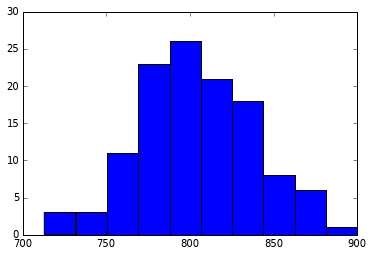

In [5]:
py.hist(x)
py.show()

Wykrywanie anomalii
-------------------
Zakładamy rozkład Poissona. Jakie jest prawdopodobieństwo otrzymania wartości 800, 850, 900 (lub większej)? Czy da się określić wartość graniczną?

Najpierw dopasowujemy parametr rozkładu Poissona $\mu$ do naszych danych. W tym przypadku to po prostu średnia.

In [6]:
mu = x.mean()

Mając dystrybucję, można sprawdzić jakie jest prawdopodobieństwo otrzymania 800, 850, 950 (lub wartości większej). Jeśli będzie bardzo małe, powiedzmy mniejsze niż 5%, to przyjmujemy, że wielkość nie pochodzi z tego procesu. Co prawda wciąż jest przynajmniej 5% szansy, że wartość pochodzi z tego rozkładu, ale zakładamy, że ryzyko błędu (tzw. błąd I rodzaju - odrzucenie hipotezy zerowej, kiedy jest ona prawdziwa) jest do zaakceptowania.

In [7]:
p_800 = 1 - ss.poisson.cdf(800, mu)
p_850 = 1 - ss.poisson.cdf(850, mu)
p_900 = 1 - ss.poisson.cdf(900, mu)
print(p_800, p_850, p_900)

0.548801852271 0.0520525558027 0.000420280684067


Alternatywnie można znaleźć wartość graniczną poniżej której prawdopodobieństwo zawsze będzie mniejsze niż 5%

In [8]:
pval = ss.poisson.ppf(0.95, mu)
print(pval)

851.0


Za każdym razem, gdy sprawdzana wielkość będzie większa niż 851, będziemy mogli ją odrzucić na 5% poziomie istotności.